In [1]:
import numpy as np
import seaborn as sns

In [2]:
# количество пространственных узлов в пластине по оси х
Nx = 10
# количество пространственных узлов в пластине по оси y
Ny = 10
# окончание по времени
t_end = 1.0
# длина пластины
L = 0.5
# толщина пластины
H = 0.5
# коэффициент теплопроводности материала пластины
lamda = 46.0
# температура на границе х = 0 области решения
Th = 80.0
# температура на границе х = L области решения
Tc = 30.0
# начальная температура
T0 = 5.0

<AxesSubplot:>

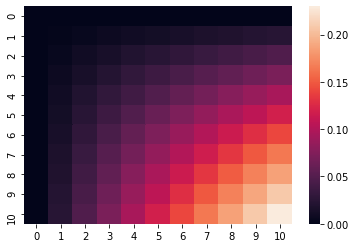

In [60]:
# аналитическое решение
def solution(x, y, t):
    return np.sin(x) * np.sin(y) * np.exp(-2 * t)

xy = np.meshgrid(np.linspace(0, L, Nx + 1), np.linspace(0, H, Ny + 1))
layer0 = solution(xy[0], xy[1], 0)
sns.heatmap(layer0)

In [4]:
# расчетные шаги сетки по пространственным координатам
hx = L / (Nx - 1)
hy = H / (Ny - 1)

In [5]:
# расчетный шаг сетки по времени
tau = t_end / 100

In [7]:
# поле температуры в начальный момент времени  
T = np.full((Nx + 1, Ny + 1), T0)
for i in range(1, Nx + 1):
    for j in range(1, Ny + 1): 
        print(T[i][j])

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


In [19]:
alfa = np.zeros(((Nx + 1) * (Ny + 1)))
beta = np.zeros(((Nx + 1) * (Ny + 1)))
# увеличиваем переменную времени на шаг τ
time = 0.0
while time < t_end:
    time = time + tau
    # решаем СЛАУ в направлении оси Ох для определения поля температуры на промежуточном временном слое
    # начальные прогоночные коэффициенты на основе левого граничного условия
    for j in range(1, Ny + 1): 
        alfa[1] = 0
        beta[1] = Th
        
        for i in range(2, Nx):
        # ai, bi, ci, fi – коэффициенты канонического представления СЛАУ с трехдиагональной матрицей
            ai = lamda / hx**2
            bi = 2 * lamda / hx**2 + 1 / tau
            ci = lamda / hx**2
            fi = - T[i][j] / tau
            # alfa[i], beta[i] – прогоночные коэффициенты
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])
    
        # значение температуры на правой границе на основе правого граничного условия
        T[Nx][j] = Tc
    
        # используя соотношение определяем неизвестное поле температуры на промежуточном временном слое
        for i in range(Nx - 1, 0, -1):
            T[i][j] = alfa[i] * T[i + 1][j] + beta[i]
        
    # СЛАУ в направлении оси Оу для определения поля температуры на целом временном слое
    for i in range(2, Nx):
        alfa[1] = 2 * lamda * tau / (2 * lamda * tau + hy**2) # уточнить насчёт 2 в числителе!!!
        beta[1] = hy**2 * T[i][1] / (2 * lamda * tau + hy**2)
        
        # цикл с параметром для определения прогоночных коэффициентов
        for j in range(2, Ny):
        # ai, bi, ci, fi – коэффициенты канонического представления СЛАУ с трехдиагональной матрицей
            ai = lamda / hy**2
            bi = 2 * lamda / hy**2 + 1/tau
            ci = lamda / hy**2
            fi = - T[i][j] / tau
            # alfa[j], beta[j] – прогоночные коэффициенты
            alfa[j] = ai / (bi - ci * alfa[j - 1])
            beta[j] = (ci * beta[j - 1] - fi) / (bi - ci * alfa[j - 1])
        
        T[i][Ny] = (2 * lamda * tau * beta[Ny - 1] + hy**2 * T[i][Ny]) / (2 * lamda * tau *(1 - alfa[Ny - 1]) + hy**2)
    
        for j in range(Ny - 1, 0, -1): 
            T[i][j] = alfa[j] * T[i][j + 1] + beta[j] 

In [55]:
import matplotlib.pyplot as plt
for i in range(1, Nx + 1):
    for j in range(1, Ny + 1):
        print(T[i][j])   

80.0
80.0
80.0
80.0
80.0
80.0
80.0
80.0
80.0
80.0
74.44444444444477
74.44444444444477
74.44444444444477
74.44444444444478
74.44444444444478
74.4444444444448
74.44444444444478
74.44444444444478
74.44444444444478
74.44444444444478
68.8888888888892
68.8888888888892
68.8888888888892
68.8888888888892
68.88888888888921
68.88888888888921
68.88888888888921
68.88888888888921
68.88888888888921
68.88888888888921
63.333333333333634
63.333333333333634
63.333333333333634
63.33333333333364
63.33333333333365
63.333333333333655
63.333333333333655
63.33333333333366
63.33333333333366
63.33333333333366
57.77777777777807
57.77777777777807
57.77777777777807
57.77777777777807
57.77777777777808
57.777777777778084
57.777777777778084
57.777777777778084
57.777777777778084
57.777777777778084
52.22222222222247
52.22222222222247
52.22222222222247
52.22222222222248
52.222222222222484
52.22222222222249
52.22222222222249
52.22222222222249
52.22222222222249
52.22222222222249
46.66666666666688
46.66666666666688
46.66666

<AxesSubplot:>

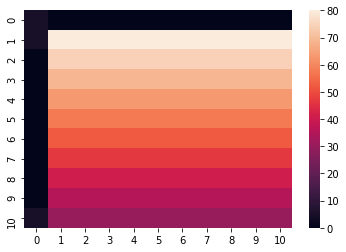

In [23]:
sns.heatmap(T)

In [41]:
np.round(layer0, 5)

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.0025 , 0.00499, 0.00747, 0.00993, 0.01237, 0.01477,
        0.01714, 0.01946, 0.02174, 0.02396],
       [0.     , 0.00499, 0.00997, 0.01492, 0.01983, 0.0247 , 0.0295 ,
        0.03423, 0.03888, 0.04342, 0.04786],
       [0.     , 0.00747, 0.01492, 0.02233, 0.02969, 0.03697, 0.04416,
        0.05124, 0.05819, 0.065  , 0.07164],
       [0.     , 0.00993, 0.01983, 0.02969, 0.03947, 0.04915, 0.05871,
        0.06812, 0.07737, 0.08641, 0.09525],
       [0.     , 0.01237, 0.0247 , 0.03697, 0.04915, 0.06121, 0.07311,
        0.08483, 0.09634, 0.10761, 0.11861],
       [0.     , 0.01477, 0.0295 , 0.04416, 0.05871, 0.07311, 0.08733,
        0.10133, 0.11508, 0.12854, 0.14168],
       [0.     , 0.01714, 0.03423, 0.05124, 0.06812, 0.08483, 0.10133,
        0.11758, 0.13353, 0.14915, 0.16439],
       [0.     , 0.01946, 0.03888, 0.05819, 0.07737, 0.09634, 0.11508,
 

In [42]:
np.round(T, 5)

array([[ 5.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 5.     , 80.     , 80.     , 80.     , 80.     , 80.     ,
        80.     , 80.     , 80.     , 80.     , 80.     ],
       [ 0.     , 74.44444, 74.44444, 74.44444, 74.44444, 74.44444,
        74.44444, 74.44444, 74.44444, 74.44444, 74.44444],
       [ 0.     , 68.88889, 68.88889, 68.88889, 68.88889, 68.88889,
        68.88889, 68.88889, 68.88889, 68.88889, 68.88889],
       [ 0.     , 63.33333, 63.33333, 63.33333, 63.33333, 63.33333,
        63.33333, 63.33333, 63.33333, 63.33333, 63.33333],
       [ 0.     , 57.77778, 57.77778, 57.77778, 57.77778, 57.77778,
        57.77778, 57.77778, 57.77778, 57.77778, 57.77778],
       [ 0.     , 52.22222, 52.22222, 52.22222, 52.22222, 52.22222,
        52.22222, 52.22222, 52.22222, 52.22222, 52.22222],
       [ 0.     , 46.66667, 46.66667, 46.66667, 46.66667, 46.66667,
        46.66667, 46.66667, 46.66667, 46.66

In [43]:
np.abs(layer0 - T).max()

79.99750208263902